# International Net Migration Trends for 4 "Remain" Counties 2008-2017
## What were immigration trends within the 4 selected counties that voted to "Remain"?
## How to calculate immigration rate?

In [7]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [8]:
#import original csv file found online from offical UK data source - removed unecessary columns
original_csv = "../Resources/original_data.csv"

In [9]:
original_data = pd.read_csv(original_csv)

In [10]:
original_df = pd.DataFrame(original_data)
original_df.head()

,Area Code,Area Name,Mid-2007 to Mid-2008,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Mid-2008 to Mid-2009,Unnamed: 8,Unnamed: 9,...,Mid-2015 to Mid-2016,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Mid-2016 to Mid-2017,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,NaN,NaN,Mid-2008 Population Estimate,Long-Term International Migration,NaN,Internal Migration\n (within UK),NaN,Mid-2009 Population Estimate,Long-Term International Migration,NaN,...,Mid-2016 Population Estimate,Long-Term International Migration,NaN,Internal Migration\n (within UK),NaN,Mid-2017 Population Estimate,Long-Term International Migration,NaN,Internal Migration\n (within UK),NaN
1,NaN,NaN,NaN,Inflow,Outflow,Inflow,Outflow,NaN,Inflow,Outflow,...,NaN,Inflow,Outflow,Inflow,Outflow,NaN,Inflow,Outflow,Inflow,Outflow
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E92000001,England,"51,815,853","553,735","316,545","98,843","116,591","52,196,381","525,074","350,353",...,"55,268,067","579,326","277,709","95,356","107,541","55,619,430","512,075","301,505","99,676","118,100"
4,N92000002,Northern Ireland,"1,779,152","18,261","11,981","12,141","10,707","1,793,333","14,404","11,406",...,"1,862,137","12,998","11,540","10,806","10,806","1,870,834","11,310","10,727","10,759","10,167"


# Edited CSV file to exclude unecessary data and formatting
### Calculated long-term international net migration rate with formula: 
#### Net Migration Rate = (Inflow-Outflow)/Mid-Point Population x1000
 + created an excel function for that formula and calculated net migration rate for all given regions/counties
+ deleted inflow, outflow, and mid-point population data because all was now encompassed in single data point 

In [11]:
#import CSV file edited CSV file 
immigration_csv = "../Resources/LTI_Net_Migration1.csv"

In [12]:
#read csv file to create dataframe
migration_data = pd.read_csv(immigration_csv)

In [13]:
#display dataframe 
migration_df = pd.DataFrame(migration_data)
migration_df.head()

,Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,England,5.0,3.0,4.0,4.0,3.0,3.0,4.0,6.0,5.0,4.0
1,Northern Ireland,4.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0
2,Scotland,3.0,4.0,4.0,5.0,2.0,0.0,1.0,4.0,4.0,2.0
3,Wales,2.0,2.0,0.0,1.0,0.0,2.0,2.0,2.0,3.0,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Set Name as index to easily reference rows
migration_df = migration_df.set_index("Name") 

In [15]:
#collect years where data was collected 
years = migration_df.keys()

In [16]:
#create variables to hold migration rates for "remain" regions from dataframe
england_rate = migration_df.loc[["England"],["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]]
cambridge_rate = migration_df.loc[["Cambridge"],["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]]
oxford_rate = migration_df.loc[["Oxford"],["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]]
lambeth_rate = migration_df.loc[["Lambeth"],["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]]
scotland_rate = migration_df.loc[["Scotland"],["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]]                  

<IPython.core.display.Javascript object>


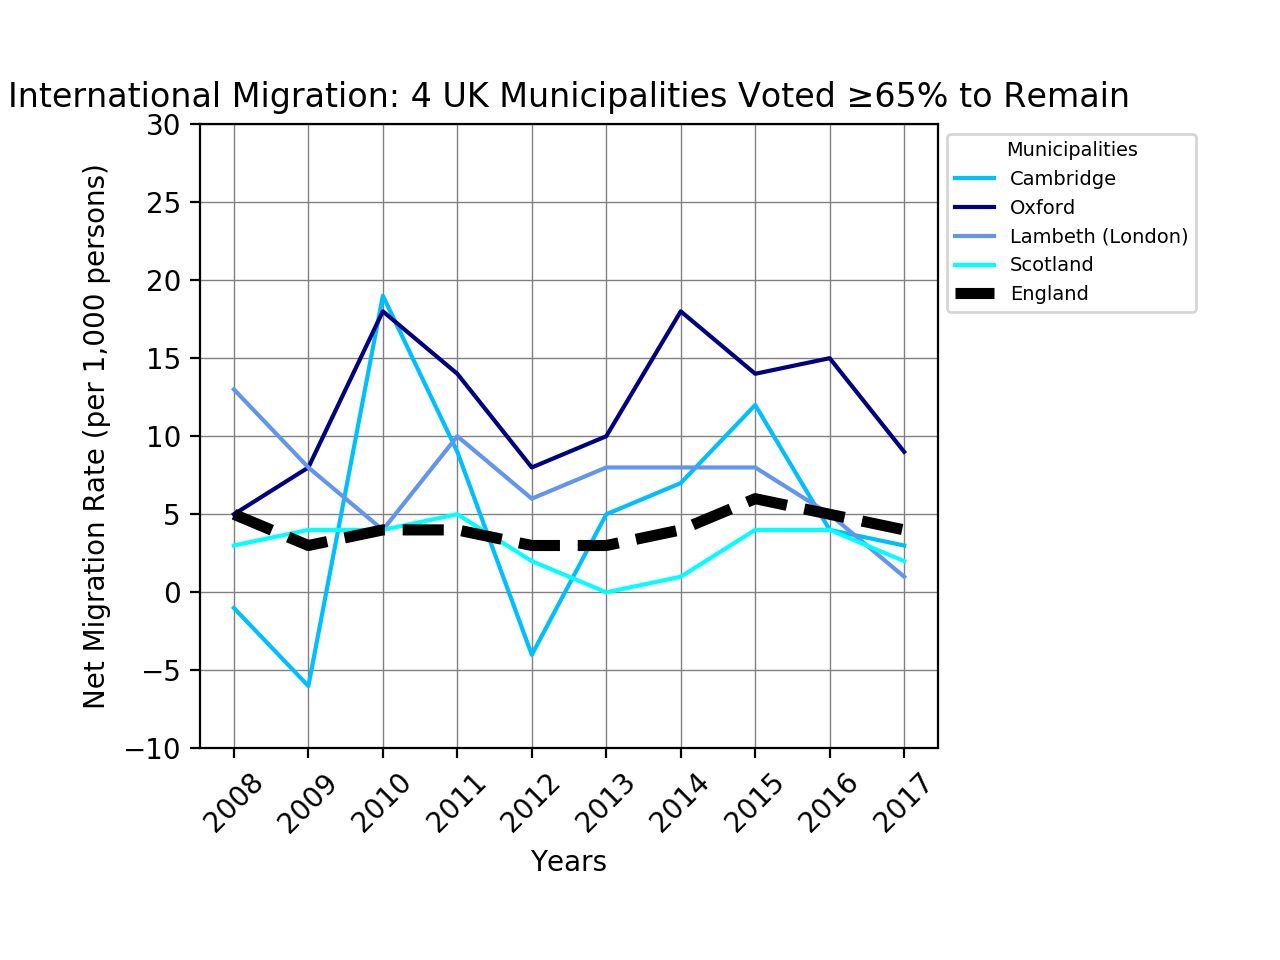

In [17]:
#create a stay chart
#use the variables created above to identify the data for the trend line
#use .squeeze to make sure data for all years were able to fit on the axis
cambridge = plt.plot(cambridge_rate.columns, cambridge_rate.squeeze(),color="deepskyblue", label="Cambridge")
oxford = plt.plot(oxford_rate.columns, oxford_rate.squeeze(),color ="navy", label="Oxford")
lambeth = plt.plot(lambeth_rate.columns, lambeth_rate.squeeze(),color="cornflowerblue", label="Lambeth (London)")
scotland = plt.plot(scotland_rate.columns, scotland_rate.squeeze(),color="cyan", label="Scotland")
england = plt.plot(england_rate.columns, england_rate.squeeze(),linewidth=4,color="black",linestyle="--",label="England")
#format the graph
plt.title("International Migration: 4 UK Municipalities Voted ≥65% to Remain")
plt.xticks(rotation="45")
#set the x axis and y axis limits to ensure that the comparison is possible with the "Leave" graph
plt.ylim(top=30)
plt.ylim(bottom=-10)
plt.xlabel("Years")
plt.ylabel("Net Migration Rate (per 1,000 persons)")
plt.grid(color='grey', linestyle='-', linewidth=.5)
#create a legend outside of the chart to prevent the legend from covering important data points
legend = plt.legend(loc='upper left', title='Municipalities',prop={'size':7}, bbox_to_anchor=(1,1))
plt.tight_layout(pad=3)
plt.setp(legend.get_title(),fontsize='x-small')
plt.show()

<IPython.core.display.Javascript object>


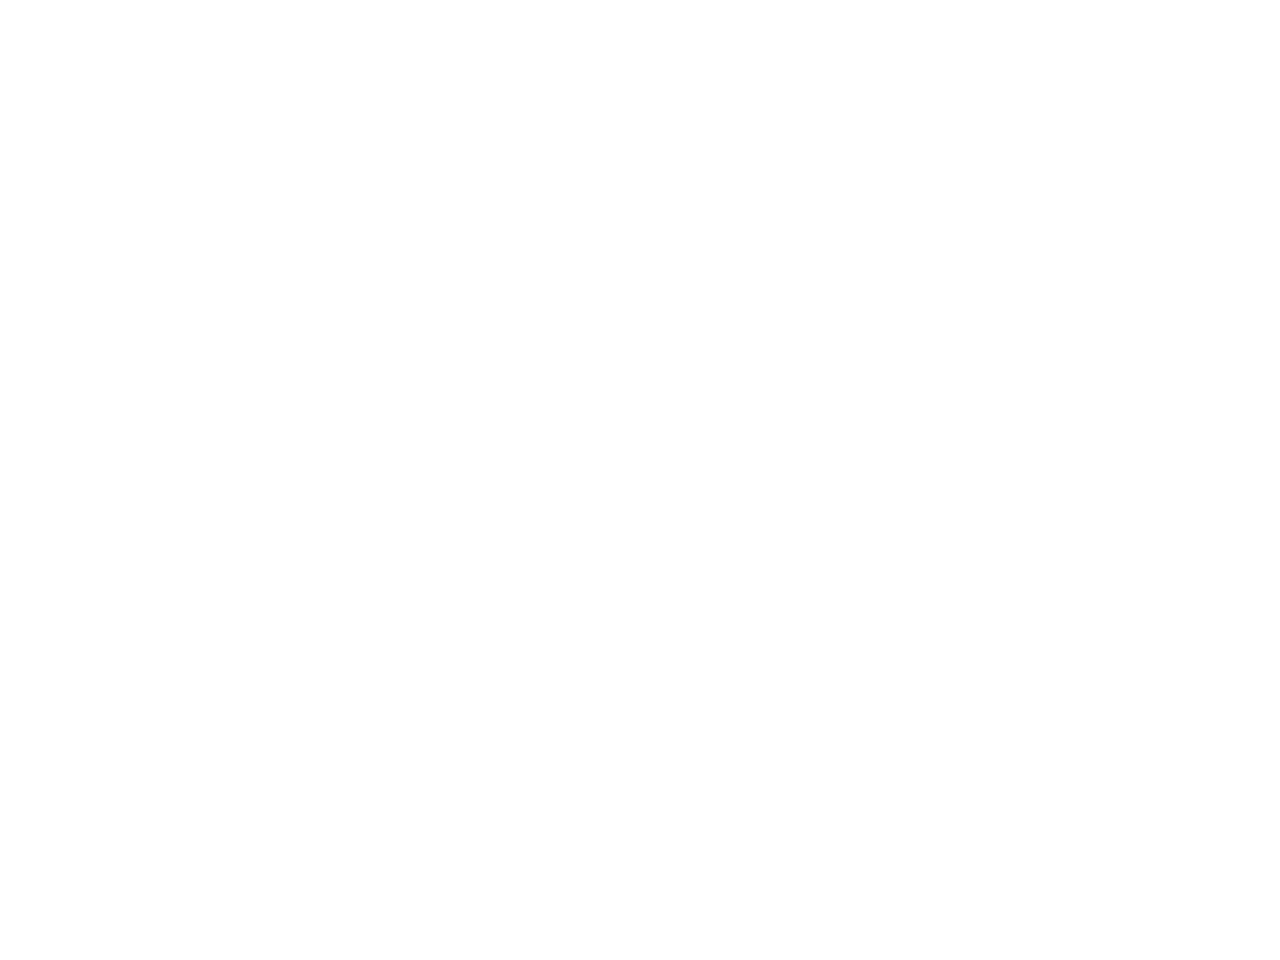

In [18]:
#save figure as a png file 
plt.savefig('International Migration: 4 UK Municipalities Voted ≥65% to Remain')

## Main Findings:
+ 3 of the 4 counties selected had net international migration rates above the England national average indicated by the black dashed line 
+ Cambridge and Oxford had some of the highest rates net migration - however both counties include large universities which could skew data 
+ Interestingly, the peaks of the Oxford and Cambridge rate are still below many of the data points for the Boston "Leave" county
+ The main data source did not have a breakdown of counties in Scotland for this information but the average for Scotland national-level data and England national-level data 
### Next Steps:
+ Examine if there is a correlation between "strength" of remain sentiment and trends in net migration rate in a larger sample 
+ Compare other immigration data like sponsoship data and/or asylum data to better understand 
+ Compare county data with regional data with data on country of birth
+ Compare regional data on country of birth with national data on reason given for migration

# International Net Migration Trends for 4 "Leave" Counties 2008-2017

In [19]:
#create variables to hold the migration rates for "leave" regions
england_rate = migration_df.loc[["England"],["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]]
boston_rate = migration_df.loc[["Boston"],["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]]
nelincolnshire_rate = migration_df.loc[["North East Lincolnshire"],["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]]
castlepoint_rate = migration_df.loc[["Castle Point"],["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]]
havering_rate = migration_df.loc[["Havering"],["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]]                       

<IPython.core.display.Javascript object>


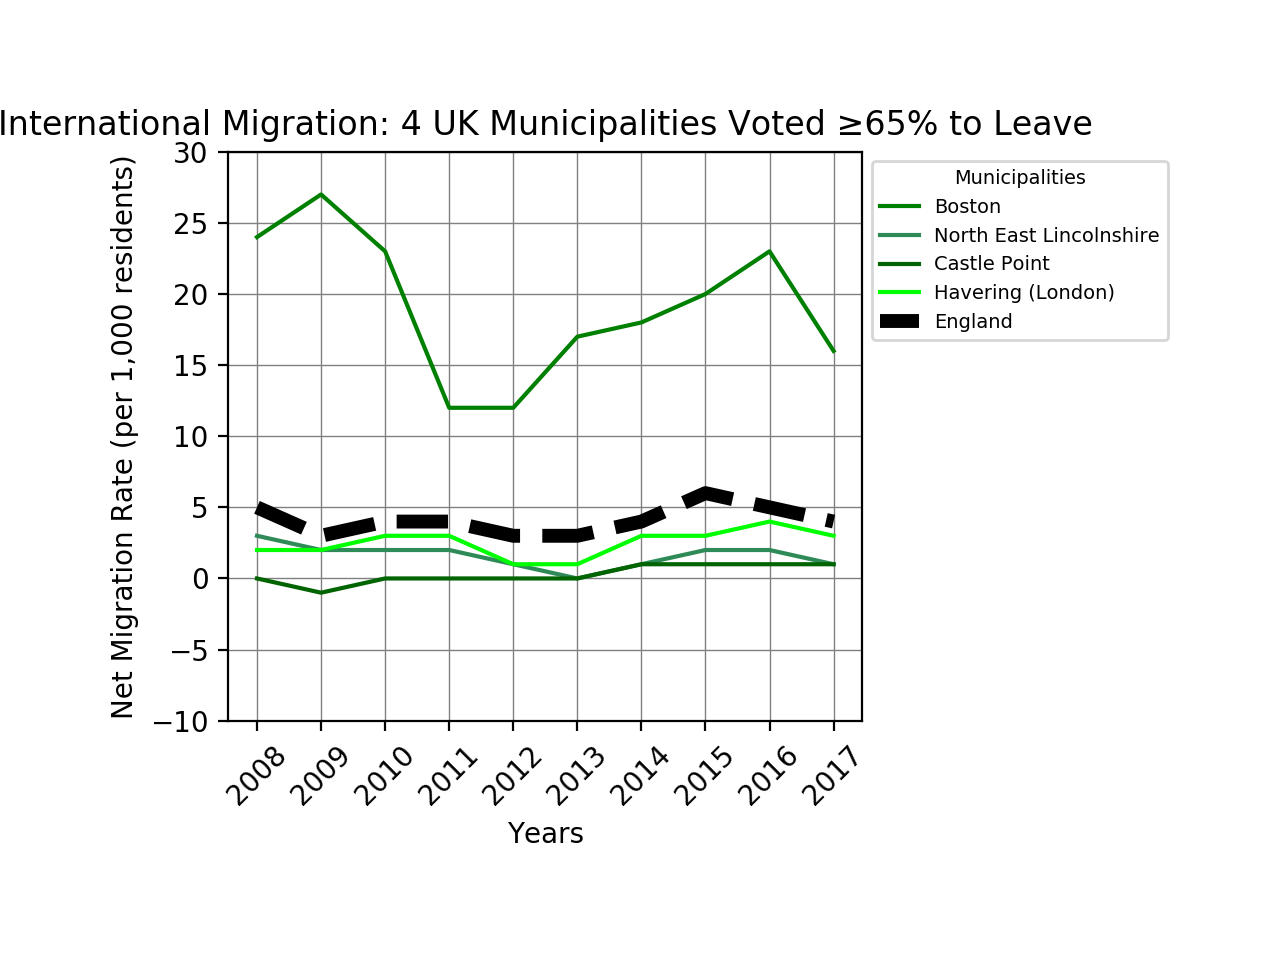

In [20]:
#create leave chart 
boston = plt.plot(boston_rate.columns, boston_rate.squeeze(), color = "green", label ="Boston")
nelincolnshire = plt.plot(nelincolnshire_rate.columns, nelincolnshire_rate.squeeze(),color="seagreen", label="North East Lincolnshire")
castlepoint = plt.plot(castlepoint_rate.columns,castlepoint_rate.squeeze(), color="darkgreen", label="Castle Point")
havering = plt.plot(havering_rate.columns,havering_rate.squeeze(),color="lime",label="Havering (London)")
england = plt.plot(england_rate.columns, england_rate.squeeze(),linewidth=5, linestyle="--",color="black",label="England")
plt.title("International Migration: 4 UK Municipalities Voted ≥65% to Leave")
plt.xlabel("Years")
plt.ylabel("Net Migration Rate (per 1,000 residents)")
plt.grid(color='grey', linestyle='-', linewidth=.5)
plt.xticks(rotation="45")
plt.ylim(top=30)
plt.ylim(bottom=-10)
legend = plt.legend(loc='upper left', title='Municipalities',prop={'size':7}, bbox_to_anchor=(1,1))
plt.tight_layout(pad=4)
plt.setp(legend.get_title(),fontsize='x-small')
plt.show()

<IPython.core.display.Javascript object>


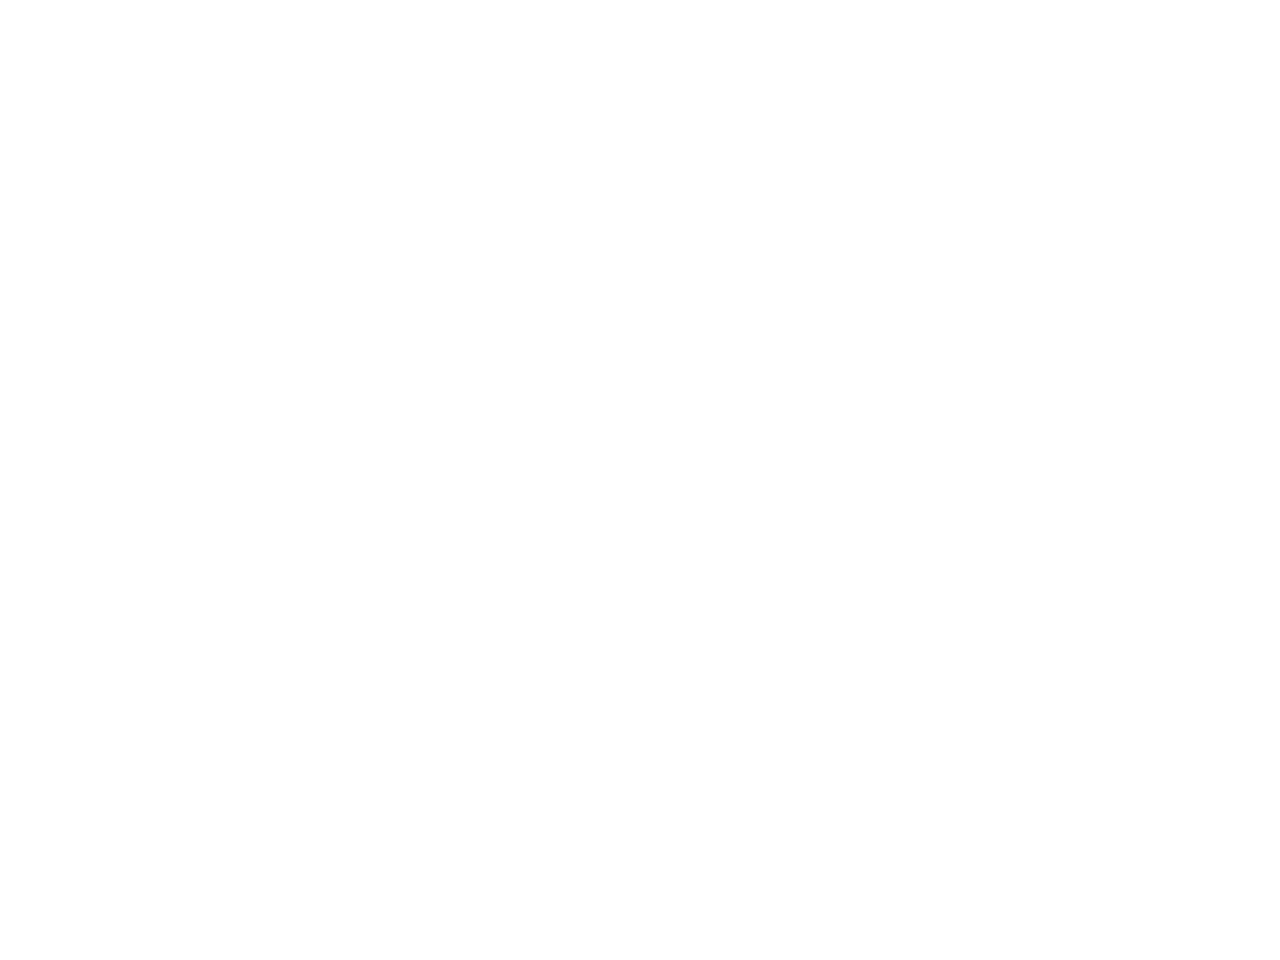

In [22]:
plt.savefig('International Migration: 4 UK Municipalities Voted ≥65% to Leave')

### Main Findings: 
+ 3 of the 4 counties selected were below the England National Average (indicated by the black dotted line) 
+ Boston County which voted to leave by 75% had net migration rate that was much higher than both the national average and the other ≥65% counties selected 
+ Sample size is too small to determine how much of an outlier Boston is among "leave" counties 
### Next Steps: 
+ Examine if there is a correlation between "strength" of leave sentiment and trends in net migration rate in a larger sample 
+ Compare other immigration data like sponsoship data and/or asylum data to better understand 
+ Compare county data with regional data with data on country of birth
+ Compare regional data on country of birth with national data on reason given for migration